# Part 1: Import Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import re
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Adjust configuration of created plots
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Change display options
pd.set_option('display.max_rows', None)

In [2]:
# Read in the data
df = pd.read_csv(r'C:\Users\msgib\OneDrive\Documents\Data Analysis\Amazon_Alexa_Reviews.csv')

# Part 2: Cleaning the Data

In [3]:
# Observe the first few rows of the data
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
# Observe if there is missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

 rating - 0.0%
date - 0.0%
variation - 0.0%
verified_reviews - 0.0%
feedback - 0.0%


In [5]:
# Check unique amount of variations
df.nunique()

 rating                5
date                  77
variation             16
verified_reviews    2301
feedback               2
dtype: int64

In [6]:
# Check each column's data type
df.dtypes

 rating              int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [7]:
# Clean the verified_reviews column 
wordList = stopwords.words("english")

def clean(sentence):
    sentence = sentence.lower()
    sentence = re.sub("[^\w\d]"," ", sentence)
    sentence = " ".join([i for i in sentence.split() if i not in wordList])
    return sentence

df['cleaned_review'] = df['verified_reviews'].apply(lambda sentence : clean(sentence))

In [8]:
# Drop unnecessary columns
df.drop(columns=['date', 'variation', 'feedback'], inplace = True)

In [9]:
# Rename the rating column
df.rename(columns = {' rating':'rating'}, inplace = True)

In [10]:
# View the clean(er) dataset
df.head()

,rating,verified_reviews,cleaned_review
0,5,Love my Echo!,love echo
1,5,Loved it!,loved
2,4,"Sometimes while playing a game, you can answer...",sometimes playing game answer question correct...
3,5,I have had a lot of fun with this thing. My 4 ...,lot fun thing 4 yr old learns dinosaurs contro...
4,5,Music,music


# Part 3: Exploratory/Descriptive Analysis on Ratings and Reviews

In [11]:
# Determine the average length of a review
avg_len = np.mean(df['verified_reviews'].apply(lambda x: len([words for words in x.split(" ") if isinstance(x, str)])))
avg_len

25.74825396825397

Observation: The average length of a review is ~26 words. This shows that people care enough about the product to take the time to write a relatively long review.

In [12]:
# Determine the average rating given to the product
avrate = df['rating'].mean()
avrate

4.463174603174603

Observation: The average rating is roughly 4.46/5, which suggests that people are very satisfied with the product

In [13]:
# Observe how many of each rating was used
ratings = df['rating'].value_counts()
print(ratings)

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


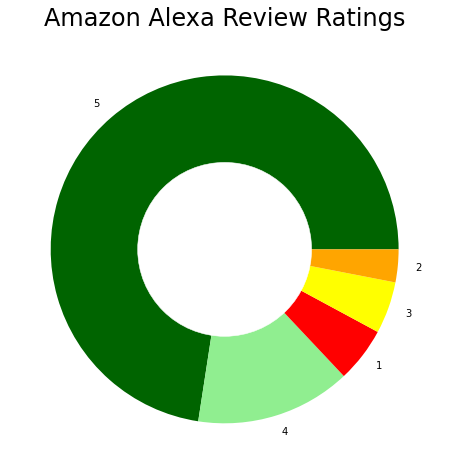

In [14]:
# Create a donut chart illustrating the amount of each rating used
numbers = ratings.index
amount = ratings.values

colorList = ["darkgreen", "lightgreen", "red", "yellow", "orange"]
plt.pie(amount, labels = numbers, colors = colorList)
center = plt.Circle((0,0), 0.5, color = 'white')
figure = plt.gcf()
figure.gca().add_artist(center)
plt.rc('font', size = 16)
plt.title("Amazon Alexa Review Ratings", size = 24)
plt.show()

Observation: ~75% of the ratings are a perfect 5/5, and ~90% are at least a 3/5. This suggests people believe the Amazon Alexa is a great product. We will see if the reviews indicate a similar sentiment.

# Part 4: Sentiment Analysis on Reviews

In [15]:
# Add in the Positive, Negative, and Neutral Columns
sentiment = SentimentIntensityAnalyzer()
df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df["cleaned_review"]]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df["cleaned_review"]]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df["cleaned_review"]]
df.head()

,rating,verified_reviews,cleaned_review,Positive,Negative,Neutral
0,5,Love my Echo!,love echo,0.808,0.000,0.192
1,5,Loved it!,loved,1.000,0.000,0.000
2,4,"Sometimes while playing a game, you can answer...",sometimes playing game answer question correct...,0.201,0.145,0.654
3,5,I have had a lot of fun with this thing. My 4 ...,lot fun thing 4 yr old learns dinosaurs contro...,0.554,0.000,0.446
4,5,Music,music,0.000,0.000,1.000


In [16]:
# Create a function that will assess the general opinion of Amazon Alexa
a = sum(df["Positive"])
b = sum(df["Negative"])
c = sum(df["Neutral"])

def overall_view(x,y,z):
    if (x>y) and (x>z):
        print("Overall, opinions are positive")
    elif (y>x) and (y>z):
        print("Overall, opinions are negative")
    else:
        print("Overall, opinions are neutral")

overall_view(a,b,c)

Overall, opinions are neutral


In [17]:
# Observe how many reviews were Positive, Negative, and Neutral
print("Positive: ", a)
print("Negative: ", b)
print("Neutral: ", c)

Positive:  1440.4830000000038
Negative:  121.452
Neutral:  1502.068999999993


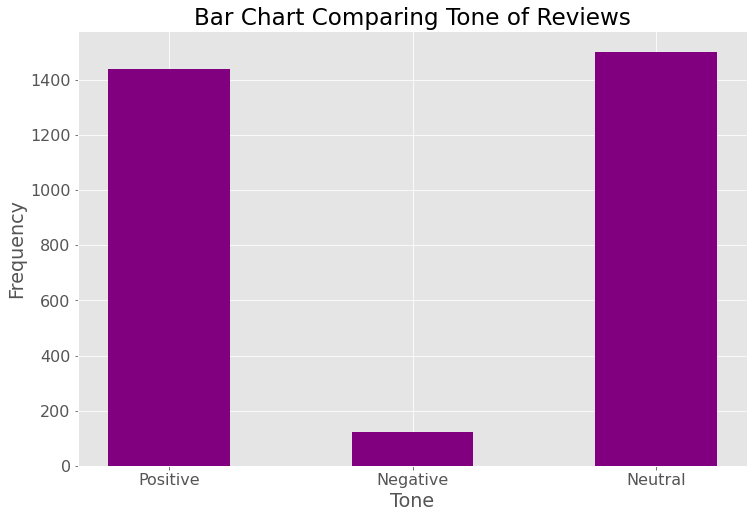

In [18]:
# Create histogram illustrating the number of positive/negative/neutral reviews
sentiment_values = [a,b,c]
sentiment_types = ["Positive", "Negative", "Neutral"]
plt.bar(sentiment_types, sentiment_values, color = 'purple', width = 0.5)
plt.title("Bar Chart Comparing Tone of Reviews")
plt.ylabel("Frequency")
plt.xlabel("Tone")
plt.show()

Observation: It appears that peoples' reviews are split between either being positive or neutral. This suggests that the product is not as perfect as its ratings seem to indicate, and more can be done to improve the product, that of course will require further analysis. However, it is important to note that the low number of negativity about the product is consistent between the reviews and ratings. Also, this analysis demonstrates a flaw of a 1-5 rating system, in that it overgeneralizes how people view a product/thing.

# Part 5: Export to Excel for visualizations in Tableau

In [19]:
# Loop over cleaned reviews into list
word_l = []
for i in range(3150):
    s = df['cleaned_review'][i].split(" ")
    for j in s:
        word_l.append(j)
word_l
df2 = pd.DataFrame(word_l)

In [20]:
# Export data table to Excel
import openpyxl

df2.to_excel(r'C:\Users\msgib\OneDrive\Documents\Data Analysis\Alexa_Tabelau1.xlsx', index=False)